# Lesson 11 - Logistic Regression

### The following topics are discussed in this notebook:
* Logistic regression background
* Performing logistic regression using scikit-learn.

### Additional Resources
* [Hands-On Machine Learning, Ch 4](https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb)
* [Introduction to Statistical Learning, Section 4.3](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Prelimary: The Sigmoid Function

The **sigmoid** or **logit** function is given by the following formula:

$\Large \sigma(x) = \frac{e^x}{1+e^x} = \frac{1}{1 + e^{-x}}$

A plot of the sigmoid function is shown below.

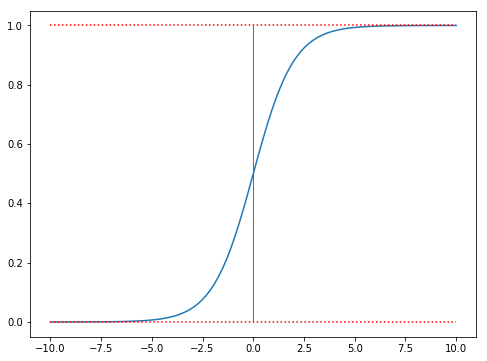

In [2]:
x = np.linspace(-10,10,100)
y = 1 / (1 + np.exp(-x))

plt.close()
plt.rcParams["figure.figsize"] = [8,6]
plt.plot(x,y)
plt.plot([-10,10],[1,1], linestyle=':', c="r")
plt.plot([-10,10],[0,0], linestyle=':', c="r")
plt.plot([0,0],[0,1], linewidth=1, c="dimgray")
plt.show()

We can adjust the position and shape of the sigmoid function by swapping `x` out of a linear function of `x`. 

$\LARGE \sigma(x) = \frac{e^{b_0 + b_1 x}}{1+e^{b_0 + b_1 x}} = \frac{1}{1 + e^{-({b_0 + b_1 x})}}$


In [3]:
%matplotlib inline
%run -i examples/example08.py

A Jupyter Widget

## Logistic Regression

Logistic regression is a probabilistic linear classification method that can be used to estimate the probability that an observation belongs to a particular class based on the feature values. Logistic regression can be adapted for use in multi-class classification problems, but we will begin by discussing the standard version of the algorithm, which is a binary classifier. 

Consider the following scenario:

* Assume we have several features, $X = [x^{(1)}, x^{(2)}, ..., x^{(p)}]$.
* We wish to predict the value of a categorical label `y`. For convenience, assume the classes of `y` are coded as 0 and 1. 
* Denote the values of the training features for observation number $i$ as $X_i = [x^{(1)}_i, x^{(2)}_i, ..., x^{(p)}_i]$.
* Denote the value of the label for observation $i$ as $y_i$. 

The logistic regression model is constructed as follows:

* Let $\hat p \approx P \left[ y = 1 ~|~ X = x \right]$. That is, $\hat p$ is an estimate of the probability that an observation belongs to class 1, given some specific set of feature values, $X = x$.
* We will assume that $\hat p$ follows a model of the form: $\large \hat p = \frac {1} {
1 - \exp\left[-\left(\hat{\beta}_0 + \hat{\beta}_1 x^{(1)} + \hat{\beta}_2 x^{(2)} ... + \hat{\beta}_p x^{(p)}\right)\right]
}$.
* Given a set of observed features, $X$, we classify the observation as follows: $
\quad\hat y = \left\{
        \begin{array}{ll}
            0 & \text{if  } \hat p < k \\
            1 & \text{if  } \hat p \geq k
        \end{array}
    \right.$
* The threshold value $k$ in the expression above is a constant, and is typically set as $k = 0.5$.

### Training the Model using Log Likelihood

* Let $b_0, b_1, ..., b_p$ be a set (not necessarily optimal) parameter values used to define a model $\enspace\large \hat p = \frac {1} {1 - \exp\left[-\left({b}_0 + {b}_1 x^{(1)} + {b}_2 x^{(2)} ... + {b}_p x^{(p)}\right)\right]}$.
* For each training observation, calculate $\enspace\large \hat p_i = \frac {1} {1 - \exp\left[-\left({b}_0 + {b}_1 x_i^{(1)} + {b}_2 x_i^{(2)} ... + {b}_p x_i^{(p)}\right)\right]}$.
* For each $i$, define $\hat\pi_i$ as follows: $
\quad\hat\pi_i = \left\{
        \begin{array}{ll}
            p_i & \text{if  } y_i = 1 \\
            1 - p_i & \text{if  } ~y_i = 0
        \end{array}
    \right.$
* Then $\hat\pi_i$ is the estimate our current model provides for the probability that observation $i$ falls into its actual observed class. 
* We want to choose a model that maximizes the probability of getting the set of labels we have observed. In otherwise, we want to maximize the likelihood score, $L = \pi_1 \cdot \pi_2 \cdot ... \cdot \pi_n$.
* From a computational standpoint, it is generally easy to maximize log-likelihood: $\ln L = \ln(\pi_1) + \ln(\pi_2) + ... + \ln(\pi_n)$


In [6]:
%matplotlib inline
%run -i examples/example09.py
# by linear regression, when a person spends 0 hour, the person has NEGATIVE 3.5% of passing the test

A Jupyter Widget

## Calculating Log Likelihood for a Proposed Model

In [ ]:
X = np.array([2, 5, 6, 7, 8, 10]).reshape(6,1)
y = np.array([0, 0, 1, 0, 1, 1])

In [ ]:
beta = np.array([-4, 0.75])
z = beta[0] + np.sum(beta[1:] * X, axis=1)
prob1 = 1 / (1 + np.exp(-z))
prob0 = 1 - prob1
pi = prob0
sel = (y == 1)
pi[sel] = prob1[sel]
loglik = np.sum(np.log(pi))
print(loglik)

## Using Scikit-Learn to Perform Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(C=1e10)
model.fit(X,y)

print(model.intercept_)
print(model.coef_)

### Making Predictions

In [ ]:
X_new = np.array([4, 6, 6.5, 7]).reshape(4,1)
print(model.predict(X_new))

In [ ]:
print(model.predict_proba(X_new))

### Model Accuracy

In [ ]:
print('Accuracy:', model.score(X,y))

## Logistic Regression with Multiple Features

In [ ]:
import MLUtilities as mlu
import sklearn.datasets as skds

In [ ]:
np.random.seed(45)
X, y = skds.make_classification(n_samples = 1000, n_classes = 2, n_features=2, 
                                n_redundant=0, n_informative=2, n_clusters_per_class=1,) 

plt.close()
plt.figure(figsize=(8, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], marker='o', c='b',
            s=25, edgecolor='k', label=0)
plt.scatter(X[y==1, 0], X[y==1, 1], marker='o', c='r',
            s=25, edgecolor='k', label=1)
plt.legend()
plt.show()

In [ ]:
lr_model = LogisticRegression(C=1e10)
lr_model.fit(X,y)

print('Intercept:', lr_model.intercept_)
print('Coefficients:', lr_model.coef_)
print('Accuracy:', lr_model.score(X,y))

In [ ]:
mlu.plot_regions(lr_model, X, y)

In [ ]:
sc_model = mlu.SplitClassifier(X,y)
sc_model.summary()

In [ ]:
mlu.plot_regions(sc_model, X, y)